**HoughCircles**

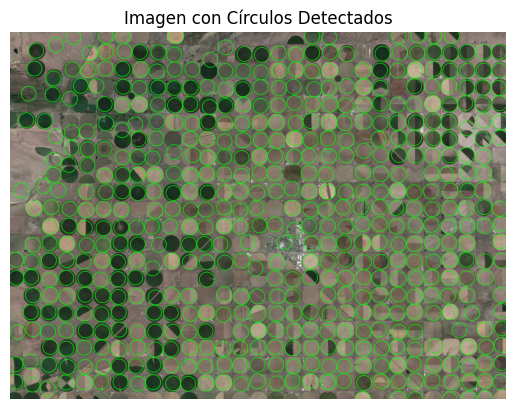

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen satelital
image = cv2.imread('satellite.jpeg', cv2.IMREAD_COLOR)

# Preprocesar la imagen si es necesario

# Convertir la imagen a escala de grises para la detección de círculos
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar la Transformada de Hough para la detección de círculos
circles = cv2.HoughCircles(
    gray,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=70,  # Ajustar la distancia mínima según su imagen
    param1=1,
    param2=10,
    minRadius=int(3.5 * 10),  # Convertir 3.5 km a metros
    maxRadius=int(3.5 * 10)
)

if circles is not None:
    circles = np.uint16(np.around(circles)) # type: ignore

    for circle in circles[0, :]:# type: ignore
        x, y, r = circle
        # Dibujar el círculo en la imagen original
        cv2.circle(image, (x, y), r, (0, 255, 0), 2)  # Color verde, grosor 2

    # Convertir la imagen BGR a RGB (necesario para plt.imshow)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Mostrar la imagen con los círculos usando plt.imshow
    plt.imshow(image_rgb)
    plt.axis('off')  # Desactivar ejes en la trama
    plt.title('Imagen con Círculos Detectados')
    plt.show()
else:
    print("No se detectaron círculos.")


**Binary Mask**

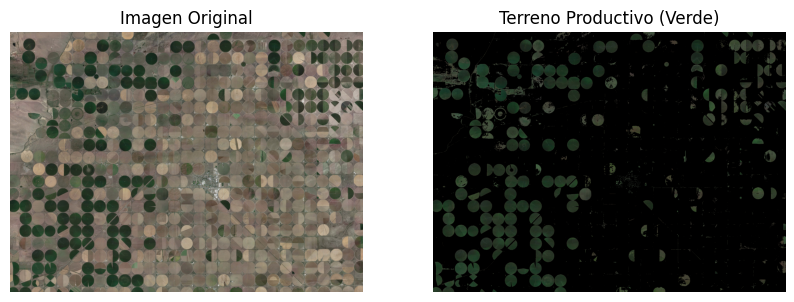

Porcentaje de campos productivos (verdes): 17.85%
Porcentaje de campos no productivos: 82.15%


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('satellite.jpeg', cv2.IMREAD_COLOR)


image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

lower_green = np.array([0, 0,0], dtype="uint8")
upper_green = np.array([75, 255, 75], dtype="uint8")

green_mask = cv2.inRange(image_rgb, lower_green, upper_green)

total_pixels = image.shape[0] * image.shape[1]
green_pixels = cv2.countNonZero(green_mask)
percentage_productive = (green_pixels / total_pixels) * 100
percentage_non_productive = 100 - percentage_productive

result_image = cv2.bitwise_and(image_rgb, image_rgb, mask=green_mask)

# Mostrar la imagen con los campos productivos resaltados
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result_image)
plt.title('Terreno Productivo (Verde)')
plt.axis('off')

plt.show()

print(f"Porcentaje de campos productivos (verdes): {percentage_productive:.2f}%")
print(f"Porcentaje de campos no productivos: {percentage_non_productive:.2f}%")


**HoughCircles with mask**

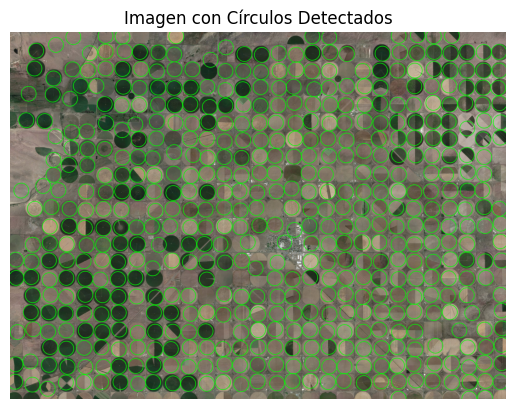

Porcentaje de campos productivos: 18.16%
Porcentaje de campos no productivos: 32.18%
Porcentaje de campos desconocidos: 49.66%


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('satellite.jpeg', cv2.IMREAD_COLOR)


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

circles = cv2.HoughCircles(
    gray,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=70,  
    param1=1,
    param2=10,
    minRadius=int(3.5 * 10),  
    maxRadius=int(3.5 * 10)
)

if circles is not None:
    circles = np.uint16(np.around(circles))# type: ignore
    
    total_area = image.shape[0] * image.shape[1]  

   
    lower_green = np.array([0, 0, 0])  
    upper_green = np.array([90, 70, 120])
    
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    green_mask = cv2.inRange(hsv_image, lower_green, upper_green)
    
    productive_area = 0  
    non_productive_area = 0  

    for circle in circles[0, :]:# type: ignore
        x, y, r = circle

       
        if y < green_mask.shape[0] and x < green_mask.shape[1]:
           
            area = np.pi * r * r

           
            if green_mask[y, x] == 255:
                productive_area += area
            else:
                non_productive_area += area

            
            cv2.circle(image, (x, y), r, (0, 255, 0), 2)  

    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

   
    percentage_productive = (productive_area / total_area) * 100
    percentage_non_productive = (non_productive_area / total_area) * 100
    total=abs(percentage_non_productive+percentage_productive-100)

    plt.imshow(image_rgb)
    plt.axis('off')  
    plt.title('Imagen con Círculos Detectados')
    plt.show()

    print(f"Porcentaje de campos productivos: {percentage_productive:.2f}%")
    print(f"Porcentaje de campos no productivos: {percentage_non_productive:.2f}%")
    print(f"Porcentaje de campos desconocidos: {total:.2f}%")
else:
    print("No se detectaron círculos.")
